# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [2]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_df = pd.read_csv("D5-bank.csv")

# Checking the data

In [4]:
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579


In [5]:
data_df.shape

(515, 6)

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Bank                 515 non-null    int64
 1   DD                   515 non-null    int64
 2   Withdrawals          515 non-null    int64
 3   Deposits             515 non-null    int64
 4   Branch Area in sqft  515 non-null    int64
 5   avg daily walkins    515 non-null    int64
dtypes: int64(6)
memory usage: 24.3 KB


There are no missing values in the data

## Formula Based Technique to treat missing values

Lets suppose we have some data around health parameters of patients in an hospital, with attributes like Age, Weight,Height and BMI, now we have observed that there are few missing values in the column BMI, instead directly imputing these with conventional techniques we can use the formula based approach by creating a function using weight and height and there by filling those missing values.

In [7]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'Age':[40,25,35,78,36],'Weight':[80,92,76,67,102],'Height':[1.69,1.82,1.45,1.56,1.65],'Bmi':[28.01,np.NaN,36.15,np.NaN,37.47]})
df

,Age,Weight,Height,Bmi
0,40,80,1.69,28.01
1,25,92,1.82,NaN
2,35,76,1.45,36.15
3,78,67,1.56,NaN
4,36,102,1.65,37.47


In [8]:
def calculate_bmi(x):
    weight=df.Weight
    height=df.Height
    bmi = (weight/(height)**2)
    return bmi

In [9]:
df['Bmi']= df[['Bmi']].apply(lambda x: calculate_bmi(x))

In [10]:
df

,Age,Weight,Height,Bmi
0,40,80,1.69,28.010224
1,25,92,1.82,27.774423
2,35,76,1.45,36.147444
3,78,67,1.56,27.531229
4,36,102,1.65,37.465565


This technique makes use of an user defined function with the required formula and broadcasts the output as per the formula using inbuilt lambda function, you can try this as part of an extra exercise and take the liberty of implemeting in your upcoming Data Mining project of clustering.

# Checking Summary Statistic

In [11]:
data_df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


# Checking for Duplicates

In [12]:
data_df.duplicated().sum()

0

There are no Duplicates in the dataset

# Scaling the data

In [13]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [14]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [15]:
scaled_df = pd.DataFrame(X.fit_transform(data_df.iloc[:,1:6]),columns=data_df.columns[1:])

In [16]:
scaled_df

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [17]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [18]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [19]:
# Get the labels
k_means.labels_

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

### Within Cluster Sum of Squares

In [20]:
k_means.inertia_

1943.3740862056477

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [21]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

C:\Users\pranai\Anaconda3-2022\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


2575.0000000000005

In [22]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1593.970857719221

In [23]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1375.4932875022525

In [24]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1220.2742967592992

In [25]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

1115.743872395149

WSS reduces as K keeps increasing

### Calculating WSS for other values of K - Elbow Method

In [26]:
wss =[] 

In [27]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

C:\Users\pranai\Anaconda3-2022\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [28]:
wss

[2575.0000000000005,
 1943.3740862056477,
 1593.970857719221,
 1375.4932875022525,
 1220.2742967592992,
 1115.743872395149,
 1024.2940640357656,
 945.039078113271,
 886.3657321414202,
 832.7774003606155]

In [29]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\pranai\Anaconda3-2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


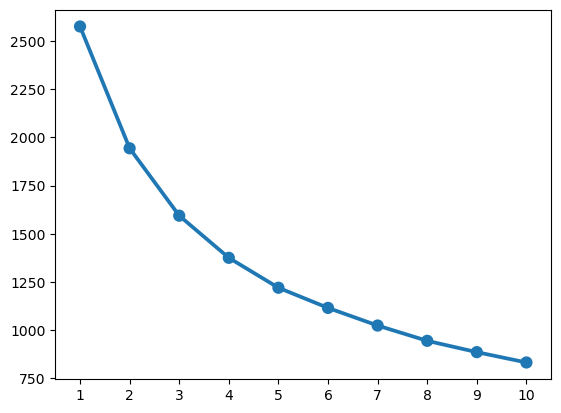

In [31]:
sns.pointplot(a, wss);

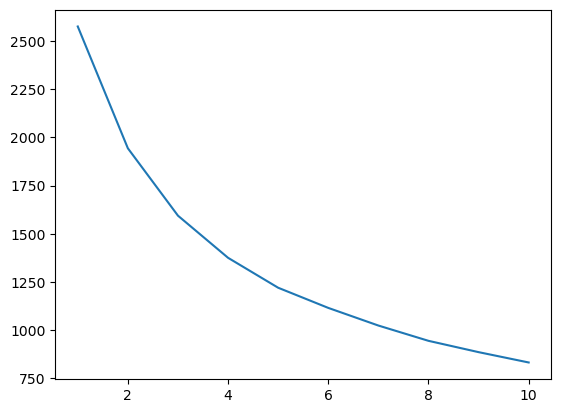

In [32]:
plt.plot(range(1,11), wss)

# KMeans with K=3

In [33]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.218819843712231

# KMeans with K=4

In [36]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [37]:
#from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
silhouette_score(scaled_df,labels,random_state=1)

0.22755082117068726

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [39]:
data_df["Clus_kmeans4"] = labels
data_df.head()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clus_kmeans4
0,1,227,147,111,2460,639,1
1,2,123,86,65,3510,436,0
2,3,306,149,76,2570,669,1
3,4,251,112,129,3650,623,2
4,5,174,135,128,3400,579,0


# Cluster Profiling

In [40]:
data_df.Clus_kmeans4.value_counts().sort_index()

0     97
1    130
2    139
3    149
Name: Clus_kmeans4, dtype: int64

In [41]:
clust_profile=data_df.drop(['Bank'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=data_df.Clus_kmeans4.value_counts().sort_index()
clust_profile

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,freq
Clus_kmeans4,,,,,,
0,169.041237,93.865979,97.319588,2995.206186,495.536082,97
1,278.961538,192.038462,89.261538,2595.461538,693.761538,130
2,290.884892,105.215827,72.661871,3115.755396,601.388489,139
3,177.953020,194.040268,73.322148,3022.281879,580.080537,149


- Cluster 0: Medium size bank with less withdrawal,walkin, DD but highest Deposit
- Cluster 1: Medium size bank with less walkins and deposits and high withdrawals
- Cluster 2: Small size bank with less deposit but highest walkins and Withdrawals, and large DD
- Cluster 3: Large size bank with more number of walkins and highest DD, but less Deposits

# Some Recommendations

1. The banks in Cluster 3 has high DD and Withdrawals, but less Deposit.  So it needs to improve in making the customers Deposit more. Relatively large number of customers are visiting these banks. So, can promote various deposit schemes to these customers.


2. Customers in Cluster 3 seems to prefer payment through DD as these banks record the highest DD rate. Banks can check if DD is being made to other banks or to the same bank, and can look to create DD schemes for their own bank, so that customers will open their account with these banks and use the DD payment scheme.


3. Customers preferring DD payment can go to banks either in Cluster 3 (if they need large space which can manage large crowd probably with more infrastructure facilities), or Cluster 2 (if they want small space where probably quick transaction can happen due to less crowd holding capacity) 


4. Size of the bank doesn't matter in accomodating large group of customers inside the bank, as Cluster 2 though having the least Branch Area, has the highest daily walk ins. So, banks don't need to invest more in occupying large land space. This could mean Customers are visiting throughout the day rather than a large group of customers visiting during a period.


5. Cluster 0 has large area and the proportion of withdrawals and deposits is almost equal. Most of these customers could be having a savings account since the withdrawals as well as DD are less when compared to other clusters. Customers visiting these banks are also lesser than other clusters. These banks can look bringing in more customers and increase the bank deposit by introducing various deposit schemes.


6. Deposit is again less, while the withdrawals are much higher for Cluster 1. These banks can also look to introducing new deposit schemes.


7. Banks in cluster 1 and 2, needs to focus on their infrastructure and banking facilities, since the area is lesser than cluster 0 and 3 , whereas daily walkins is the highest. These banks can also look for opportunities to cross-sell products to the customers.


In [36]:
#data_df.to_csv('km.csv')